### 3_Sprint_3T03.
#### Source: 03 EXAMINING DATA" amb seaborn i utilitzant el dataset "movies".
#### Eloi Canals

- Exercici 3
En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
# Open the choosen file

movies= pd.read_csv('movies.dat', sep='::', encoding='ISO-8859-1', warn_bad_lines = True, engine='python', names=["ID","Movie","Genre"])


movies[['Movie','Year']] = movies['Movie'].str.extract('(.*)\((\d{4})\)', expand=False)
movies['Year'] = pd.to_numeric(movies['Year'])
movies.head()

,ID,Movie,Genre,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [5]:
movies.shape

(3883, 4)

In [6]:
movies.columns

Index(['ID', 'Movie', 'Genre', 'Year'], dtype='object')

In [7]:
movies.Year.unique()


array([1995, 1994, 1996, 1976, 1993, 1992, 1988, 1967, 1964, 1977, 1965,
       1982, 1962, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970,
       1960, 1955, 1956, 1959, 1968, 1980, 1975, 1986, 1948, 1943, 1963,
       1950, 1946, 1987, 1997, 1974, 1958, 1949, 1972, 1998, 1933, 1952,
       1951, 1957, 1961, 1954, 1934, 1944, 1942, 1941, 1953, 1939, 1947,
       1945, 1938, 1935, 1936, 1926, 1932, 1930, 1971, 1979, 1966, 1978,
       1985, 1983, 1984, 1931, 1922, 1927, 1929, 1928, 1925, 1923, 1999,
       1919, 2000, 1920, 1921])

In [8]:
movies.Genre.nunique()

301

In [9]:
movies.describe().round(3)

,ID,Year
count,3883.000,3883.000
mean,1986.049,1986.067
std,1146.778,16.896
min,1.000,1919.000
25%,982.500,1982.000
50%,2010.000,1994.000
75%,2980.500,1997.000
max,3952.000,2000.000


In [10]:
desglose_df = movies.Genre.str.get_dummies(sep='|')
desglose_df.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
#movies.drop('Genre', inplace=True, axis=1)

movies = movies.join(desglose_df, how = 'left', lsuffix='left', rsuffix='right')
# movies = movies.merge(desglose_df) ERROR. Totes les pelis son Toy Story
movies.head()

,ID,Movie,Genre,Year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,Animation|Children's|Comedy,1995,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,Adventure|Children's|Fantasy,1995,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,Comedy|Drama,1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
movies.Action.mean()

0.12953901622456862

In [13]:
decades = movies.groupby(['Year'], sort = True)
df = decades.sum()
df.head()

,ID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Year,,,,,,,,,,,,,,,,,,,
1919,8776,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
1920,6540,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1921,3310,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1922,4543,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1923,9011,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0


In [14]:
# filtrar decada els 80
decades.get_group(1980).head()

,ID,Movie,Genre,Year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
677,684,Windows,Drama,1980,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1112,1128,"Fog, The",Horror,1980,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1114,1130,"Howling, The",Horror,1980,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1119,1135,Private Benjamin,Comedy,1980,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1178,1196,Star Wars: Episode V - The Empire Strikes Back,Action|Adventure|Drama|Sci-Fi|War,1980,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [17]:
# Agrupar per any
Anys = df[df != 0].sum(axis=1).astype(np.int64)

#Anys_80 = movies[(movies.Year >= 1980 & movies.Year <= 1989)] ERRROR
Anys_80_Today = movies[movies.Year >= 1980]
Anys_80 = Anys_80_Today[Anys_80_Today.Year <= 1989]
Anys_80.head()

,ID,Movie,Genre,Year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
140,142,Shadows (Cienie),Drama,1988,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,541,Blade Runner,Film-Noir|Sci-Fi,1982,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
588,592,Batman,Action|Adventure|Crime|Drama,1989,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
606,610,Heavy Metal,Action|Adventure|Animation|Horror|Sci-Fi,1981,1,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
674,681,Clean Slate (Coup de Torchon),Crime,1981,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
Generes = df[df != 0].sum(axis=0).astype(np.int64)
GeneresClean=Generes.drop(['ID'])
#Generes.drop('ID', inplace=True, axis=1)
GeneresClean

Action          503
Adventure       283
Animation       105
Children's      251
Comedy         1200
Crime           211
Documentary     127
Drama          1603
Fantasy          68
Film-Noir        44
Horror          343
Musical         114
Mystery         106
Romance         471
Sci-Fi          276
Thriller        492
War             143
Western          68
dtype: int64

In [19]:
GeneresClean = GeneresClean.sort_values()

In [20]:
from pySankey import sankey

In [21]:
decades_80 = Anys_80.groupby(['Year'], sort = True)
df_80 = decades_80.sum()
df_80.head()

Generes_80 = df_80[df_80 != 0].sum(axis=0).astype(np.int64)
Generes_80_Clean=Generes_80.drop(['ID'])
#Generes.drop('ID', inplace=True, axis=1)
Generes_80_Clean

Action         110
Adventure       78
Animation       14
Children's      31
Comedy         200
Crime           21
Documentary      9
Drama          211
Fantasy         24
Film-Noir        4
Horror         112
Musical         12
Mystery         12
Romance         54
Sci-Fi          66
Thriller        55
War             31
Western          3
dtype: int64

In [22]:
### Evolució de la producció cinematogràfica al dataset.

<AxesSubplot:ylabel='Density'>

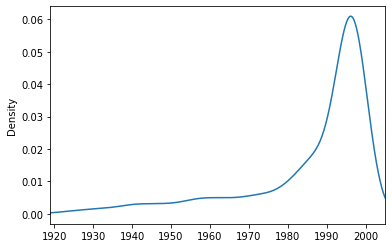

In [23]:
movies['Year'].plot(kind='kde', xlim=(1919,2005))

### Evolució de la producció cinematogràfica als anys 80.

<AxesSubplot:ylabel='Density'>

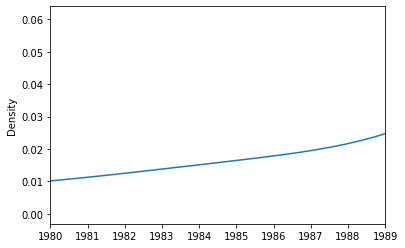

In [24]:
#movies[movies.Year == 1980]

movies['Year'].plot(kind='kde', xlim=(1980,1989))

### Generes del dataset

<AxesSubplot:>

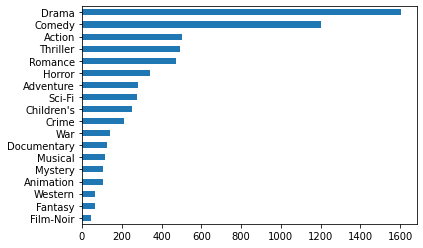

In [25]:
GeneresClean.plot(kind='barh')

<AxesSubplot:>

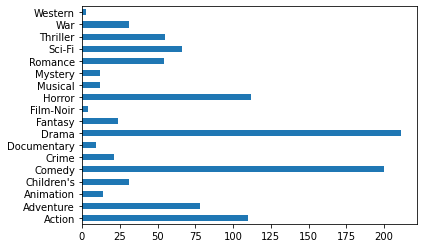

In [26]:
### Generes dels anys 80
Generes_80_Clean.plot(kind='barh')

   ### Comparant els generes de tot el dataset respecte el subgrup dels anys 80, es veu clarament una forta baixada de westerns, baixada moderada de Mistery, Film Noir.
### Les pujades importants son de Sci-Fi, Horror, Adventure, Action i comedy.

In [27]:
movies.columns

Index(['ID', 'Movie', 'Genre', 'Year', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [28]:
movies_mitjes = movies.groupby('Year').mean()

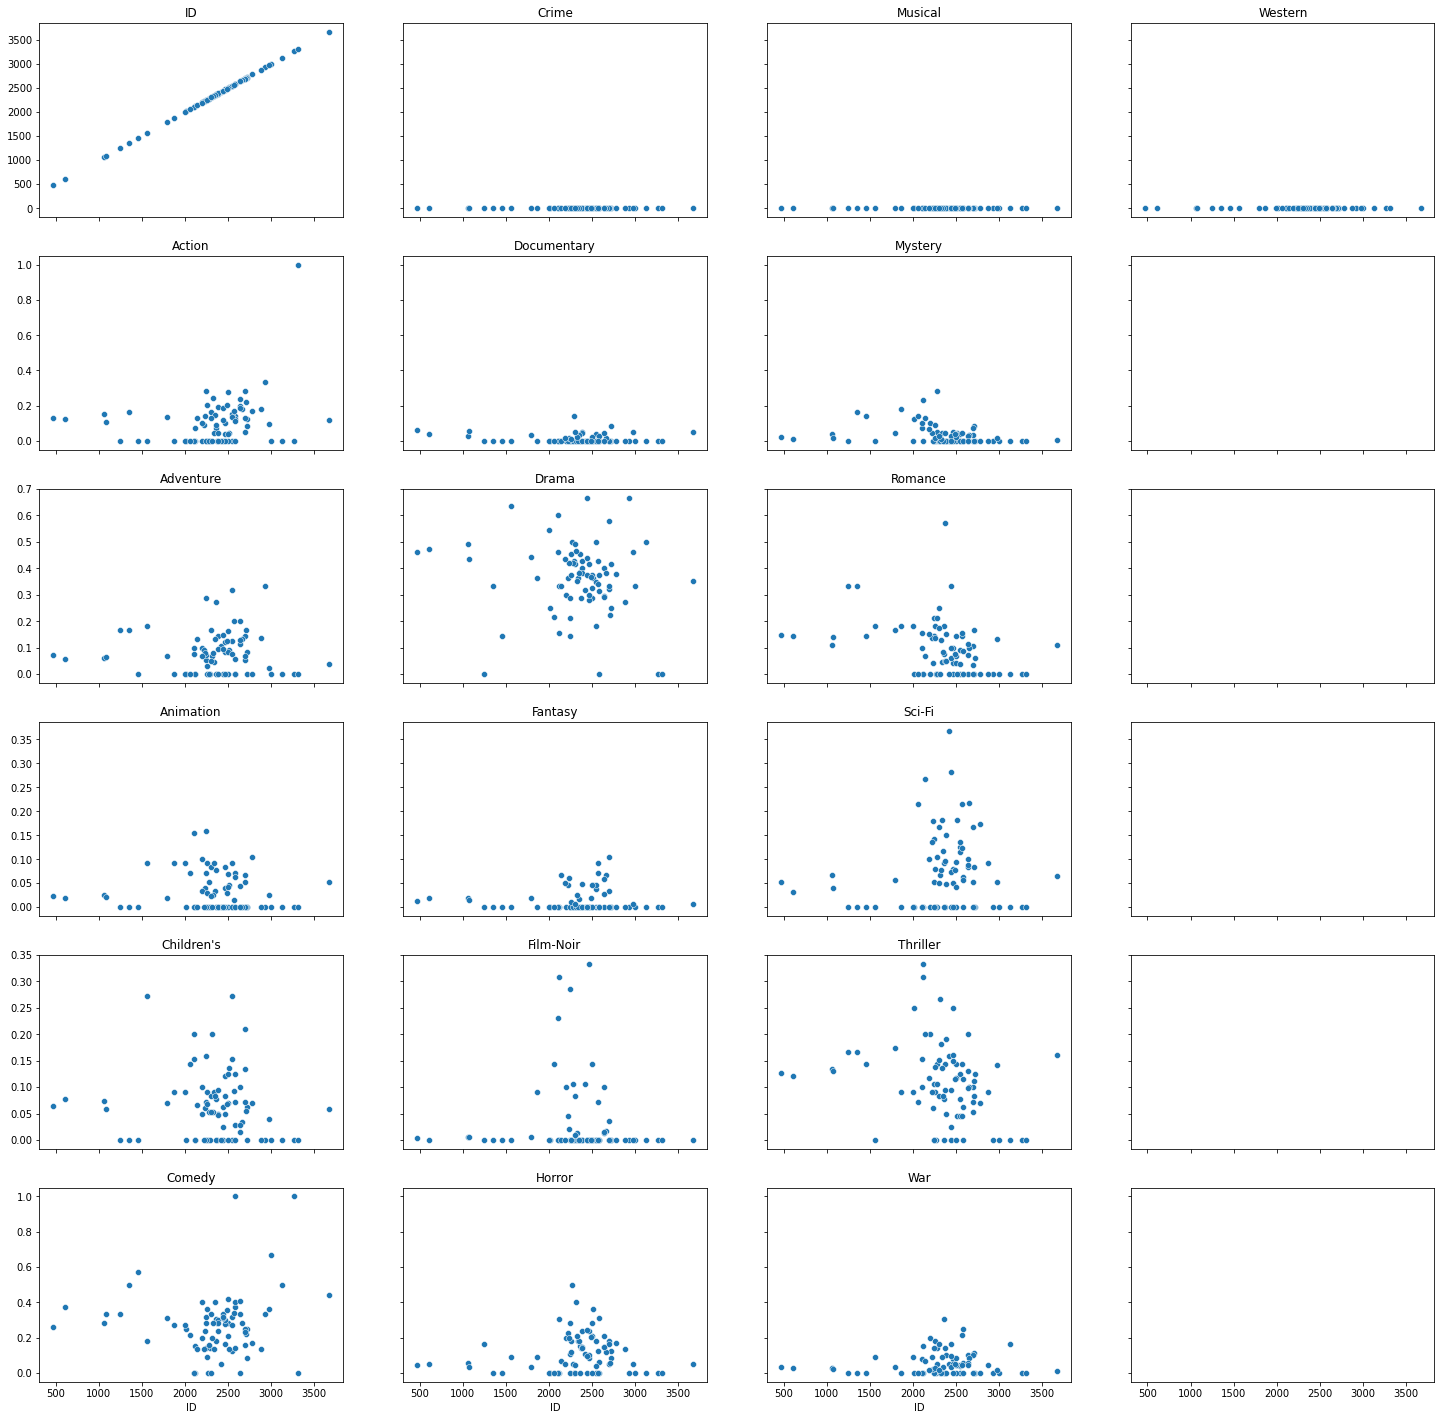

In [29]:
fig, ax = plt.subplots(6,4, sharex='col', sharey='row', figsize=(25,25))
x = y = 0
for Genere in movies_mitjes:
    sns.scatterplot(x=movies_mitjes.ID, y=Genere, data=movies_mitjes, ax=ax[x,y])
    ax[x,y].set_title(Genere)
    ax[x,y].yaxis.label.set_visible(False)
    if x < 5:
        x += 1
    else:
        x = 0
        y += 1

plt.show()

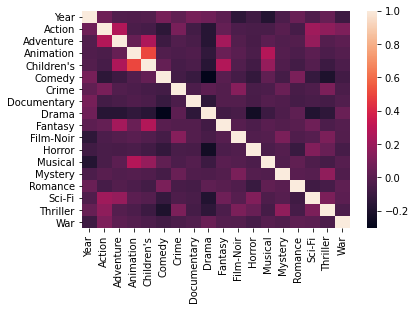

In [30]:
sns.heatmap(movies.iloc[:, 3:-1].corr());

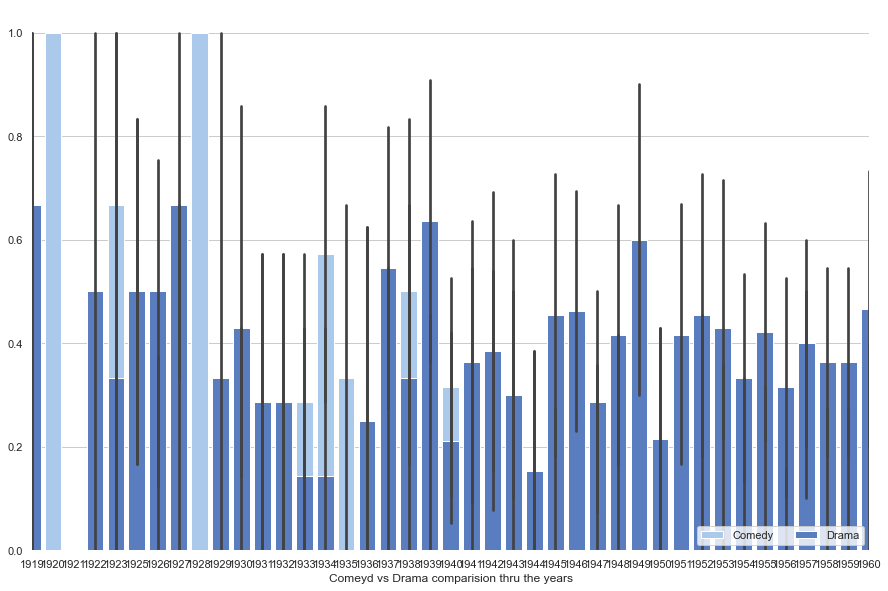

In [31]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Load the example car crash dataset
df = movies

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Year", y="Comedy", data=df,
            label="Comedy", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Year", y="Drama", data=df,
            label="Drama", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 40), ylabel="",
       xlabel="Comeyd vs Drama comparision thru the years")
sns.despine(left=True, bottom=True)

<AxesSubplot:xlabel='Sci-Fi', ylabel='Density'>

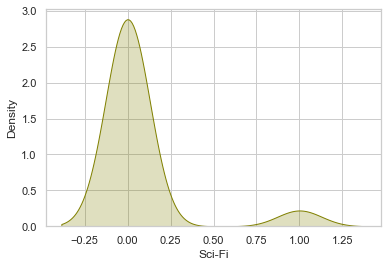

In [32]:
sns.kdeplot(movies['Sci-Fi'], shade=True, bw=0.5, color="olive")

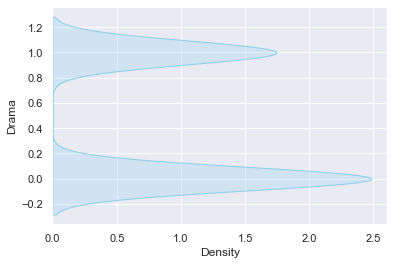

In [33]:
sns.set(style="darkgrid")
df = movies
 
# setting 'vertical' parameter to True
sns.kdeplot(df['Drama'], shade=True, vertical=True, color="skyblue")
plt.show()

<AxesSubplot:xlabel='Year', ylabel='count'>

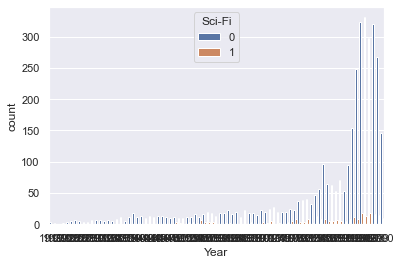

In [34]:
# Increment de pel·licules de genere ciencia ficció a través dels anys
sns.countplot(x='Year', data=movies, hue='Sci-Fi')

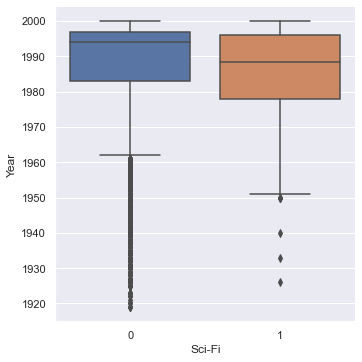

In [35]:
# Periodes de maxima producció de pel·licules Sci-Fi
sns.catplot(x='Sci-Fi',y='Year',data=movies,kind='box')

In [36]:
#Anys_90 = movies[(movies.Year >= 1990 & movies.Year <= 2000)] ERRROR
Anys_90_Today = movies[movies.Year >= 1990]
Anys_90 = Anys_90_Today[Anys_80_Today.Year <= 2000]


decades_90 = Anys_90.groupby(['Year'], sort = True)
df_90 = decades_90.sum()


Generes_90 = df_90[df_90 != 0].sum(axis=0).astype(np.int64)
Generes_90_Clean=Generes_90.drop(['ID'])
#Generes.drop('ID', inplace=True, axis=1)
Generes_90_Clean

Action          318
Adventure       136
Animation        60
Children's      148
Comedy          812
Crime           147
Documentary     113
Drama          1091
Fantasy          34
Film-Noir        10
Horror          128
Musical          31
Mystery          62
Romance         350
Sci-Fi          131
Thriller        347
War              57
Western          19
dtype: int64

In [37]:
#Anys_00 = movies[(movies.Year >= 2000 & movies.Year <= 2010)] ERRROR
Anys_00_Today = movies[movies.Year >= 2000]
Anys_00 = Anys_00_Today[Anys_00_Today.Year <= 2010]


decades_00 = Anys_00.groupby(['Year'], sort = True)
df_00 = decades_00.sum()


Generes_00 = df_00[df_00 != 0].sum(axis=0).astype(np.int64)
Generes_00_Clean=Generes_00.drop(['ID'])
#Generes.drop('ID', inplace=True, axis=1)
Generes_00_Clean.sort_values()

Western         0
Film-Noir       0
Mystery         1
Musical         1
Fantasy         1
War             2
Adventure       6
Crime           8
Documentary     8
Horror          8
Animation       8
Children's      9
Sci-Fi         10
Romance        17
Action         19
Thriller       25
Drama          55
Comedy         69
dtype: int64

In [38]:
Generes_80.sort_values()[-6:-1].to_list()


[78, 110, 112, 200, 211]

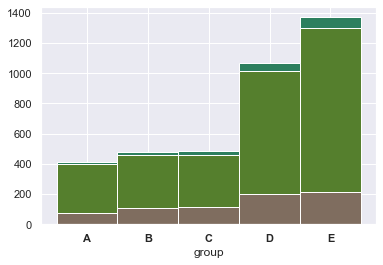

In [39]:
# Acumulat dels 5 generes amb mes pel·licules de les ultimes tres decades.

# y-axis in bold
#rc('font', weight='bold')
 
# Values of each group
bars1 = Generes_80.sort_values()[-6:-1].to_list()
bars2 = Generes_90.sort_values()[-6:-1].to_list()
bars3 = Generes_00.sort_values()[-6:-1].to_list()
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()

Text(0.5, 1.12, 'Generes')

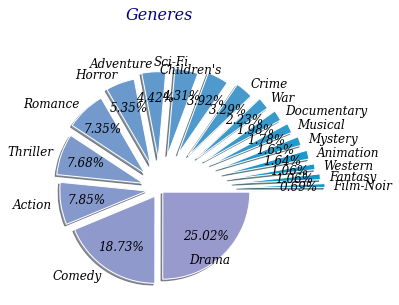

In [40]:
import random
fig, ax = plt.subplots( nrows=1, ncols=1 )
explode_0 = list(reversed([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])) 
def aleatColors(numberColors): #he jugat amb els colors, aleatori, zones, i he deixat el que m'agrada més
    listColors=[]
    for i in range(0,numberColors):
        listColors.append([0,0,0])
        listColors[i][0]=((1/numberColors)*i)*0.7 #finalment he tret el factor aleatori però deixo el nom de la funció
        listColors[i][1]=0.6
        listColors[i][2]=0.8
    return listColors
colors= aleatColors(20)        
explode =list( map(lambda x: x *0.05, explode_0))
ax.figsize=(0,0)
ax.axis('off')
fontdict_1 = {'family': 'serif','color':  'darkblue','weight': 'normal', 'size': 16, 'style':'oblique'}
fontdict_2 = {'family': 'serif','color':  'black','weight': 'normal', 'size': 12, 'style':'oblique'}#Estil dels títols
ax.pie(GeneresClean,center=(-1,-1),explode = explode,shadow=True, labels = GeneresClean.index,radius=1.0, autopct = '%1.2f%%',colors=colors,textprops =fontdict_2,pctdistance=0.7 )
ax.set_title("Generes", y=1.12, pad=35,fontdict=fontdict_1)

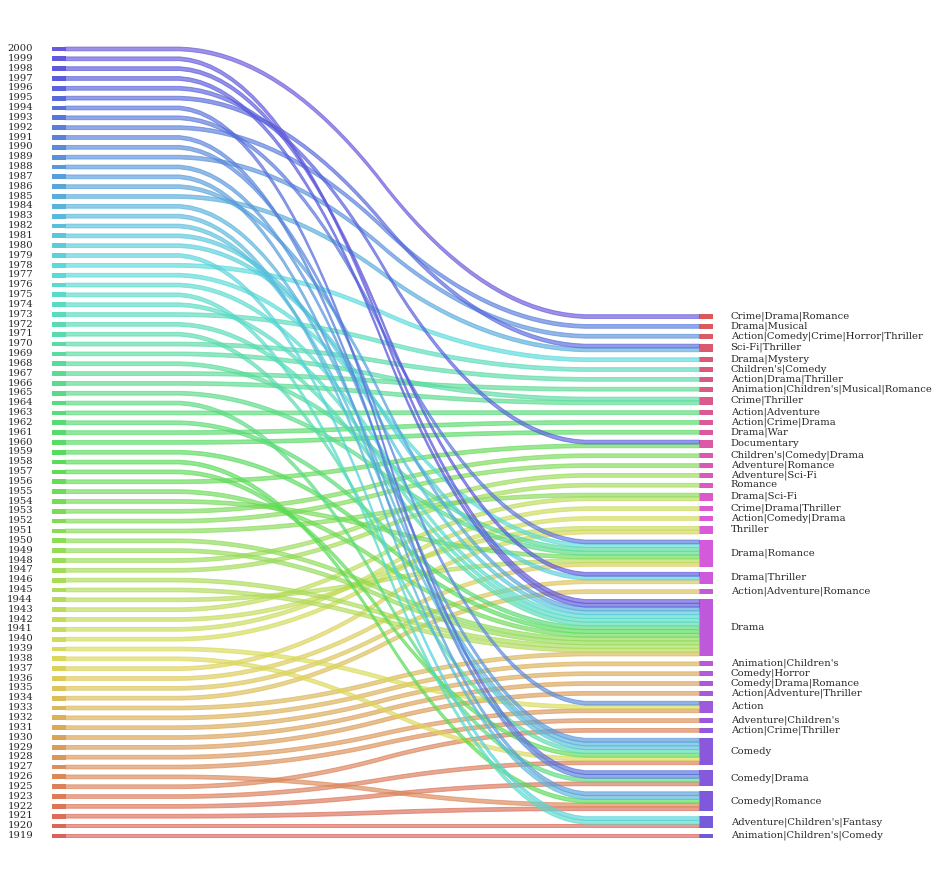

In [41]:
# Relació entre els anys i els Generes

sankey.sankey(Anys.index,movies.Genre,aspect=20,fontsize=10)
plt.gcf().set_size_inches(13,16)

# Primer savefig, segon show
plt.savefig('test.svg', format="svg")
plt.show()

<AxesSubplot:xlabel='Year'>

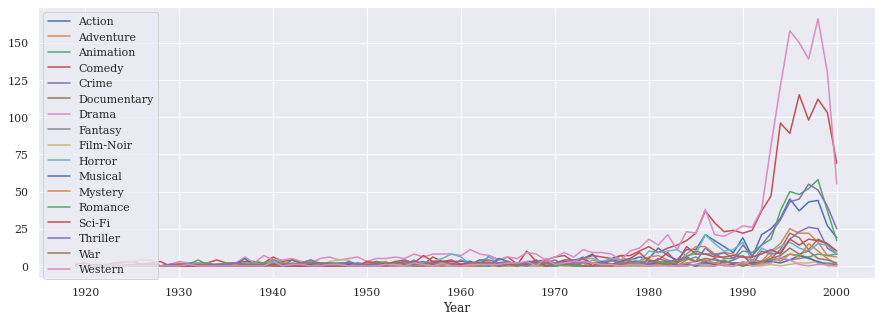

In [42]:
movies_sum = movies.groupby("Year")['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'].sum()
plt.rcParams["figure.figsize"] = (15,5)

movies_sum.plot()

In [43]:
Roll = range(0,17)
df_sorted = pd.DataFrame(Generes_00_Clean)
#df_sorted = df_sorted.set_index(Roll)
#df_sorted.columns = ('Genre','Total')
df_sorted.columns = [ 'Total']
df_sorted

,Total
Action,19
Adventure,6
Animation,8
Children's,9
Comedy,69
Crime,8
Documentary,8
Drama,55
Fantasy,1
Film-Noir,0


In [44]:
# Bars are sorted by the cumulative track length
df_sorted = df_sorted.sort_values("Total", ascending=False)

# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_sorted), endpoint=False)

# Cumulative length
LENGTHS = df_sorted["Total"].values

# Mean gain length
MEAN_GAIN = df_sorted["Total"].values

# Region label
REGION = df_sorted.index.values

# Number of tracks per region
TRACKS_N = df_sorted["Total"].values

In [45]:
import matplotlib as mpl
from textwrap3 import wrap

GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=TRACKS_N.min(), vmax=TRACKS_N.max())

findfont: Font family ['Bell MT'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bell MT'] not found. Falling back to DejaVu Sans.


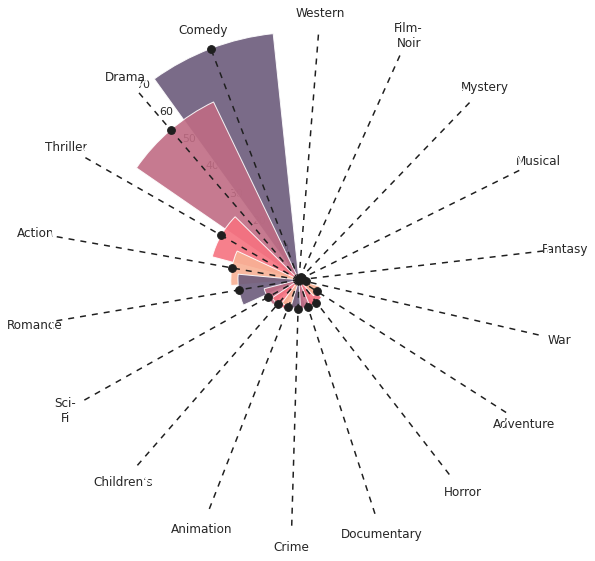

In [46]:
# Some layout stuff ----------------------------------------------
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(0, 70)

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.52, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)

# Add dots to represent the mean gain
ax.scatter(ANGLES, MEAN_GAIN, s=60, color=GREY12, zorder=11)


# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in REGION]
REGION

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=12);